In [23]:
import os
import pandas as pd 
import numpy as np
import pickle
import streamlit as st
import json
from tqdm import tqdm
tqdm.pandas(desc="Processing")

os.chdir('c:/Users/Domen/IronHack/01_projects/IH_final_project_data-jobs')
print(os.getcwd())
with open("config/config.json", 'r') as f:
    config = json.load(f)
    
NLP_data_path = config['NLP_data_path']
input_name = "skills_df"


# open and load dataframe
with open(f"{NLP_data_path}{input_name}.pkl", "rb") as f:
    data = pickle.load(f)


c:\Users\Domen\IronHack\01_projects\IH_final_project_data-jobs


In [24]:
display(data.loc[data["city"]==38])

,city,company,cp1_title,cp2_title,employment_type,first_match,id,industries,job_description,job_function,...,language,new_job_title,nlp_job_description,posting_date,scraping_date,seniority_level,skills,title,url,calc_posting_date


In [25]:
data.head(10)

,city,company,cp1_title,cp2_title,employment_type,first_match,id,industries,job_description,job_function,...,language,new_job_title,nlp_job_description,posting_date,scraping_date,seniority_level,skills,title,url,calc_posting_date
1,"Berlin, Berlin, Germany",Almedia,data_analyst bi_analyst,data analyst business intelligence,Full-time,True,3719620327,"Technology, Information and Internet",Almedia helps companies grow by promoting thei...,Analyst,...,en,"[data_analyst, bi_analyst]",almedia helps companies grow by promoting thei...,1 week ago,2023-09-26,Mid-Senior level,"[sql, excel, python]",Data Analyst - Business Intelligence,https://www.linkedin.com/jobs/search?keywords=...,2023-09-19
3,"Berlin, Berlin, Germany",Ultramarin,financial data_analyst,financial data analyst,Full-time,True,3672508925,Financial Services,About The PositionWe are looking for a top-tie...,Information Technology,...,en,[data_analyst],about the positionwe are looking for a top-tie...,2 months ago,2023-09-24,Mid-Senior level,"[matplotlib, excel, pandas, python, sql]",Financial Data Analyst (m/f/d),https://www.linkedin.com/jobs/search?keywords=...,2023-07-24
4,"Berlin, Berlin, Germany",Les Lunes,bi_analyst,business intelligence analyst,Full-time,True,3695466781,Retail Apparel and Fashion,Your missionAs a Business Intelligence Analyst...,"Research, Analyst, and Information Technology",...,en,[bi_analyst],your missionas a business intelligence analyst...,4 weeks ago,2023-09-24,Mid-Senior level,"[sql, excel, tableau, power bi]",Business Intelligence Analyst (f/m/d),https://www.linkedin.com/jobs/search?keywords=...,2023-08-27
5,"Berlin, Berlin, Germany",Orange Quarter,data_analyst,data analyst,Full-time,True,3585738180,Staffing and Recruiting,Orange Quarter are working with an exciting st...,Information Technology,...,en,[data_analyst],orange quarter are working with an exciting st...,5 months ago,2023-09-24,Entry level,[e2e],Data Analyst,https://www.linkedin.com/jobs/search?keywords=...,2023-04-24
6,"Berlin, Berlin, Germany",Orange Quarter,data_analyst,data analyst,Full-time,True,3585734564,Staffing and Recruiting,Orange Quarter are currently looking for a Dat...,Information Technology,...,en,[data_analyst],orange quarter are currently looking for a dat...,5 months ago,2023-09-24,Entry level,"[sql, snowflake, bigquery, python]",Data Analyst,https://www.linkedin.com/jobs/search?keywords=...,2023-04-24
7,"Berlin, Berlin, Germany",Enter,bi_analyst,bi analyst,Full-time,True,3704916810,Architecture and Planning,Build the future with Enter.Our mission is to ...,Information Technology,...,en,[bi_analyst],build the future with enter.our mission is to ...,3 weeks ago,2023-09-26,Mid-Senior level,"[sql, snowflake, python]",BI Analyst (f/m/d),https://www.linkedin.com/jobs/search?keywords=...,2023-09-05
8,"Berlin, Berlin, Germany",Orange Quarter,data_analyst,data analyst,Full-time,True,3585734595,Staffing and Recruiting,We are currently working with an emerging SaaS...,Information Technology,...,en,[data_analyst],we are currently working with an emerging saas...,5 months ago,2023-09-24,Entry level,"[sql, r , e2e, python]",Data Analyst,https://www.linkedin.com/jobs/search?keywords=...,2023-04-24
10,"Berlin, Berlin, Germany",kevin.,product data_analyst,product data analyst,Full-time,True,3687813018,Financial Services,kevin. is different. While everyone was talkin...,Information Technology,...,en,[data_analyst],kevin. is different. while everyone was talkin...,1 month ago,2023-09-24,Mid-Senior level,"[tableau, looker, sap, sql, power bi]",Product Data Analyst,https://www.linkedin.com/jobs/search?keywords=...,2023-08-24
14,"Berlin, Berlin, Germany",CBTW,data_analyst,data analyst,Full-time,True,3706371923,IT Services and IT Consulting,Positive Thinking Company ist Teil unseres wel...,Consulting,...,de,[data_analyst],positive thinking company ist teil unseres wel...,3 weeks ago,2023-09-26,Entry level,"[tableau, power bi, r ]",Data Analyst (m/w/d),https://www.linkedin.com/jobs/sea

In [26]:
data['posting_date'].value_counts(dropna=False)

posting_date
2 weeks ago       314
1 week ago        268
3 weeks ago       263
1 day ago         115
1 month ago        96
4 weeks ago        84
4 days ago         72
5 days ago         66
3 days ago         62
6 days ago         62
3 months ago       38
2 months ago       36
2 days ago         36
5 months ago       26
1 hour ago         23
6 months ago       12
2 hours ago        12
4 months ago       10
23 hours ago        9
19 hours ago        8
17 hours ago        8
4 hours ago         7
21 hours ago        7
3 hours ago         5
16 hours ago        4
6 hours ago         4
22 hours ago        4
5 hours ago         4
20 hours ago        3
15 hours ago        3
11 hours ago        3
10 hours ago        2
9 hours ago         2
49 minutes ago      1
37 minutes ago      1
7 months ago        1
7 hours ago         1
59 minutes ago      1
39 minutes ago      1
14 hours ago        1
12 hours ago        1
29 minutes ago      1
9 minutes ago       1
Just now            1
20 minutes ago     

In [27]:
import pandas as pd
from datetime import datetime, timedelta
from datetime import datetime


In [51]:
def time_to_weeks(row):
    scrap_date = row['scraping_date']
    posting_date = row['posting_date']    
    

    if 'minutes' in posting_date or 'hour' in posting_date or 'Just now' in posting_date:
        new_date = scrap_date
    if 'day' in posting_date:
        days = int(posting_date.split(' ')[0])
        new_date = scrap_date - timedelta(days=days)
    if 'week' in posting_date:
        weeks = int(posting_date.split(' ')[0])
        new_date = scrap_date - timedelta(weeks=weeks)
    if 'month' in posting_date:
        months = int(posting_date.split(' ')[0])
        new_date = pd.to_datetime(scrap_date) - pd.DateOffset(months=months)
    if 'year' in posting_date:
        years = int(posting_date.split(' ')[0])
        new_date = pd.to_datetime(scrap_date) - pd.DateOffset(years=years)
    
    
    if isinstance(new_date, datetime):    
        row['calc_posting_date'] = new_date.date()
    else:
        row['calc_posting_date'] = new_date
        
        
    return row

In [52]:
data = data.progress_apply(time_to_weeks, axis=1) # add transform posting date to date format


Processing: 100%|██████████| 1687/1687 [00:00<00:00, 9934.48it/s] 


In [53]:
display(data.head(10).T)

,1,3,4,5,6,7,8,10,14,17
city,"Berlin, Berlin, Germany","Berlin, Berlin, Germany","Berlin, Berlin, Germany","Berlin, Berlin, Germany","Berlin, Berlin, Germany","Berlin, Berlin, Germany","Berlin, Berlin, Germany","Berlin, Berlin, Germany","Berlin, Berlin, Germany","Berlin, Berlin, Germany"
company,Almedia,Ultramarin,Les Lunes,Orange Quarter,Orange Quarter,Enter,Orange Quarter,kevin.,CBTW,Qualitas Energy Deutschland GmbH
cp1_title,data_analyst bi_analyst,financial data_analyst,bi_analyst,data_analyst,data_analyst,bi_analyst,data_analyst,product data_analyst,data_analyst,data_analyst
cp2_title,data analyst business intelligence,financial data analyst,business intelligence analyst,data analyst,data analyst,bi analyst,data analyst,product data analyst,data analyst,data analyst
employment_type,Full-time,Full-time,Full-time,Full-time,Full-time,Full-time,Full-time,Full-time,Full-time,Full-time
...,...,...,...,...,...,...,...,...,...,...
hadoop,False,False,False,False,False,False,False,False,False,False
kubernetes,False,False,False,False,False,False,False,False,False,False
git,False,False,False,False,False,False,False,False,False,False
nosql,False,False,False,False,False,False,False,False,False,False


In [31]:
display(data.loc[data["city"]==38])

,city,company,cp1_title,cp2_title,employment_type,first_match,id,industries,job_description,job_function,...,language,new_job_title,nlp_job_description,posting_date,scraping_date,seniority_level,skills,title,url,calc_posting_date


In [54]:
data['calc_posting_date'].value_counts().head(50)

calc_posting_date
2023-09-12    255
2023-09-19    248
2023-09-05    201
2023-09-25    112
2023-09-26    100
2023-08-27     73
2023-09-23     72
2023-09-20     71
2023-09-22     69
2023-09-21     66
2023-08-29     59
2023-09-24     34
2023-09-03     33
2023-08-24     32
2023-09-10     32
2023-06-27     22
2023-07-27     20
2023-09-04     18
2023-09-17     16
2023-06-24     14
2023-09-11     14
2023-04-24     14
2023-09-13     13
2023-04-27     12
2023-09-06     11
2023-09-27     11
2023-08-26     10
2023-07-24      9
2023-03-27      8
2023-09-18      7
2023-07-26      7
2023-05-24      5
2023-05-27      4
2023-03-24      4
2023-08-30      3
2023-08-28      3
2023-06-26      2
2023-05-26      1
2023-02-27      1
2022-09-27      1
Name: count, dtype: int64

In [55]:
data.fillna("", inplace=True)
data['skills'] = data['skills'].progress_apply(lambda x: list(set(x))) # remove duplicates from skills

Processing: 100%|██████████| 1687/1687 [00:00<00:00, 832250.16it/s]


In [56]:
def remove_duplicates_and_lower(skill_list):
    return list(set([skill.lower() for skill in skill_list]))

In [35]:
# def process_skills(skill_str):
#     skill_list = skill_str.split()  # Trennen Sie den String an Leerzeichen
#     skill_list = [skill.lower() for skill in skill_list]  # Konvertieren Sie in Kleinbuchstaben
#     return list(set(skill_list))

In [57]:
data['skills'] = data['skills'].apply(remove_duplicates_and_lower)

In [58]:

for i in data.index:
    print(f"{i}-{data['skills'][i]}")

1-['sql', 'python', 'excel']
3-['sql', ' pandas', 'matplotlib', 'python', 'excel']
4-['sql', 'power bi', 'excel', 'tableau']
5-['e2e']
6-['sql', 'python', 'snowflake', 'bigquery']
7-['sql', 'python', 'snowflake']
8-['sql', 'python', 'e2e', ' r ']
10-['sql', 'power bi', 'tableau', 'looker', 'sap']
14-[' r ', 'power bi', 'tableau']
17-['python']
18-['sql', 'oracle', 'excel']
20-['sql', 'python', 'scala', 'tableau']
22-['sql', 'python']
23-['sap', 'power bi', 'excel']
26-['sql', 'python']
27-['aws', 'snowflake', 'sql', 'python', 'gitlab', 'excel']
28-['sql', 'ad-hoc', 'power bi']
29-[' r ', 'sql', 'power bi', 'python', 'tableau', 'excel']
31-['python']
34-[]
35-['excel']
38-['azure', 'sql', 'power bi', 'tableau', 'sap']
39-['sql', 'oracle']
50-['sql', 'excel']
51-['sql', 'scala', 'excel']
52-['aws', ' r ', 'python', 'excel', ' ml ']
53-['excel']
57-['deep learning', 'python', 'excel']
62-['sql', 'python', 'scikit', 'nlp']
66-[]
68-['excel']
70-['airflow', 'numpy', 'sql', 'ad-hoc', ' panda

In [59]:
import pandas as pd

def agg_skill_data(data):
    
    all_skills = []
    for skill_list in data['skills']:
        all_skills.extend(skill_list)
    feature_list = list(set(all_skills))
    
    for skill in feature_list:
        data[skill] = False 
        
    for idx, row in data.iterrows():
        for skill in row['skills']:
            data.at[idx, skill] = True
    
    for index, row in data.iterrows():
        for i, token in enumerate(row['skills']):
            if token.lower() in feature_list:
                row['skills'][i] = token.lower()
        data.at[index, 'skills'] = row['skills']
        
    skill_data = pd.DataFrame(data.skills.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')
    skill_data = skill_data[skill_data.keywords != '']
    skill_data['percentage'] = round(skill_data['counts'] / len(data) * 100, 1)

    
    return skill_data

filtered_result = agg_skill_data(data)

In [39]:
display(filtered_result)

,keywords,counts,percentage
0,sql,519,30.8
1,python,444,26.3
2,excel,353,20.9
3,sap,267,15.8
4,power bi,194,11.5
5,spark,170,10.1
6,tableau,164,9.7
7,azure,119,7.1
8,aws,107,6.3
9,java,103,6.1


In [40]:
import matplotlib.pyplot as plt

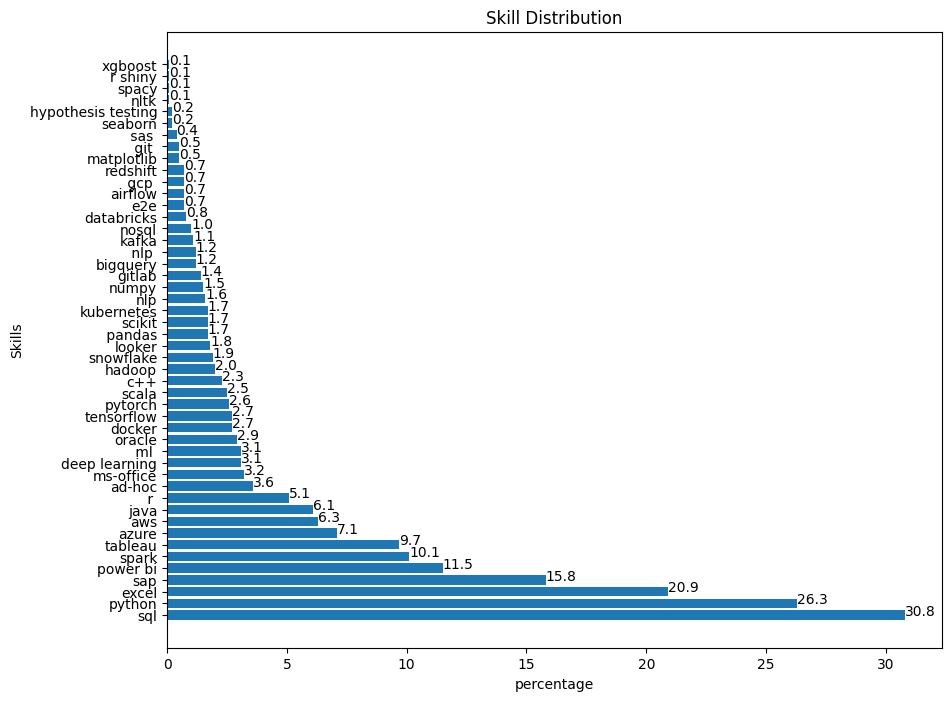

In [41]:
def plot_skill_data(result):
    plt.figure(figsize=(10, 8))
    plt.barh(result['keywords'], result['percentage'])
    plt.xlabel('percentage')
    plt.ylabel('Skills')
    plt.title('Skill Distribution')
    for index, value in enumerate(result['percentage']):
        plt.text(value, index, str(value))
    plt.show()

plot_skill_data(filtered_result)

In [42]:
data.columns

Index(['city', 'company', 'cp1_title', 'cp2_title', 'employment_type',
       'first_match', 'id', 'industries', 'job_description', 'job_function',
       'job_level', 'keyword', 'language', 'new_job_title',
       'nlp_job_description', 'posting_date', 'scraping_date',
       'seniority_level', 'skills', 'title', 'url', 'calc_posting_date', 'aws',
       'snowflake', 'deep learning', 'power bi', 'redshift', 'spacy',
       'tableau', 'xgboost', 'looker', 'sap', 'gitlab', 'spark', 'c++', ' r ',
       'tensorflow', 'bigquery', 'numpy', ' nlp ', 'nlp', 'ms-office',
       'scikit', 'seaborn', 'hypothesis testing', ' sas ', ' ml ', 'azure',
       ' pandas', 'e2e', ' gcp ', 'nltk', 'docker', 'java', 'python',
       'databricks', 'kafka', 'r shiny', 'oracle', 'pytorch', 'airflow',
       'scala', 'sql', 'ad-hoc', 'matplotlib', 'hadoop', 'kubernetes', ' git ',
       'nosql', 'excel'],
      dtype='object')

In [43]:
data.head(40)

,city,company,cp1_title,cp2_title,employment_type,first_match,id,industries,job_description,job_function,...,airflow,scala,sql,ad-hoc,matplotlib,hadoop,kubernetes,git,nosql,excel
1,"Berlin, Berlin, Germany",Almedia,data_analyst bi_analyst,data analyst business intelligence,Full-time,True,3719620327,"Technology, Information and Internet",Almedia helps companies grow by promoting thei...,Analyst,...,False,False,True,False,False,False,False,False,False,True
3,"Berlin, Berlin, Germany",Ultramarin,financial data_analyst,financial data analyst,Full-time,True,3672508925,Financial Services,About The PositionWe are looking for a top-tie...,Information Technology,...,False,False,True,False,True,False,False,False,False,True
4,"Berlin, Berlin, Germany",Les Lunes,bi_analyst,business intelligence analyst,Full-time,True,3695466781,Retail Apparel and Fashion,Your missionAs a Business Intelligence Analyst...,"Research, Analyst, and Information Technology",...,False,False,True,False,False,False,False,False,False,True
5,"Berlin, Berlin, Germany",Orange Quarter,data_analyst,data analyst,Full-time,True,3585738180,Staffing and Recruiting,Orange Quarter are working with an exciting st...,Information Technology,...,False,False,False,False,False,False,False,False,False,False
6,"Berlin, Berlin, Germany",Orange Quarter,data_analyst,data analyst,Full-time,True,3585734564,Staffing and Recruiting,Orange Quarter are currently looking for a Dat...,Information Technology,...,False,False,True,False,False,False,False,False,False,False
7,"Berlin, Berlin, Germany",Enter,bi_analyst,bi analyst,Full-time,True,3704916810,Architecture and Planning,Build the future with Enter.Our mission is to ...,Information Technology,...,False,False,True,False,False,False,False,False,False,False
8,"Berlin, Berlin, Germany",Orange Quarter,data_analyst,data analyst,Full-time,True,3585734595,Staffing and Recruiting,We are currently working with an emerging SaaS...,Information Technology,...,False,False,True,False,False,False,False,False,False,False
10,"Berlin, Berlin, Germany",kevin.,product data_analyst,product data analyst,Full-time,True,3687813018,Financial Services,kevin. is different. While everyone was talkin...,Information Technology,...,False,False,True,False,False,False,False,False,False,False
14,"Berlin, Berlin, Germany",CBTW,data_analyst,data analyst,Full-time,True,3706371923,IT Services and IT Consulting,Positive Thinking Company ist Teil unseres wel...,Consulting,...,False,False,False,False,False,False,False,False,False,False
17,"Berlin, Berlin, Germany",Qualitas Energy Deutschland GmbH,data_analyst,data analyst,Full-time,True,3701510210,Financial Services,Powering Change.Seit mehr als 16 Jahren setzen...,Information Technology,...,False,False,False,False,False,False,False,False,False,False
